**Topic:      Challenge Set 1**  
Subject:      Explore MTA turnstile data  
Date:         09/30/2018  
Name:         Arianna Breslauer  
Worked with:  Daniel Hui, Vitoria Calil

### Benson Challenges

Note: Challenges should be solved using pandas. If you are looking for extra work, you're welcome to take a stab at solving them using only python dictionaries, but this is harder and avoiding this is the entire point of pandas!


#### Challenge 1   
  
- Open up a new IPython notebook
- Download a few MTA turnstile data files
- Read them into a pandas dataframe (pd.read_csv()), format the columns nicely, and display the first few rows.   

**Optional with dictionaries**

> Open up a file, use csv reader to read it, make a python dict where
  there is a key for each (C/A, UNIT, SCP, STATION). These are the
  first four columns. The value for this key should be a list of
  lists. Each list in the list is the rest of the columns in a
  row. For example, one key-value pair should look like


> {    ('A002','R051','02-00-00','LEXINGTON AVE'):
[
['NQR456', 'BMT', '01/03/2015', '03:00:00', 'REGULAR', '0004945474', '0001675324'],
['NQR456', 'BMT', '01/03/2015', '07:00:00', 'REGULAR', '0004945478', '0001675333'],
['NQR456', 'BMT', '01/03/2015', '11:00:00', 'REGULAR', '0004945515', '0001675364'],
...
]
}

In [522]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

%matplotlib inline

import datetime

In [523]:
# Various options in pandas
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 75)
pd.set_option('display.precision', 3)

In [524]:
mtaTurnstileData = pd.read_csv("/Users/ariannabreslauer/Documents/dataScience/metis/bootcamp/week1/firstProject/01_Data/turnstile_180324.txt")

In [525]:
mtaTurnstileData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197149 entries, 0 to 197148
Data columns (total 11 columns):
C/A                                                                     197149 non-null object
UNIT                                                                    197149 non-null object
SCP                                                                     197149 non-null object
STATION                                                                 197149 non-null object
LINENAME                                                                197149 non-null object
DIVISION                                                                197149 non-null object
DATE                                                                    197149 non-null object
TIME                                                                    197149 non-null object
DESC                                                                    197149 non-null object
ENTRIES                           

In [526]:
# Checks that we have a week's worth of data
mtaTurnstileData.DATE.value_counts().sort_index()

03/17/2018    28325
03/18/2018    28193
03/19/2018    28092
03/20/2018    28177
03/21/2018    28183
03/22/2018    28140
03/23/2018    28039
Name: DATE, dtype: int64

In [527]:
mtaTurnstileData.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/17/2018,00:00:00,REGULAR,6552626,2219139
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/17/2018,04:00:00,REGULAR,6552626,2219140
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/17/2018,08:00:00,REGULAR,6552626,2219140
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/17/2018,12:00:00,REGULAR,6552626,2219140
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/17/2018,16:00:00,REGULAR,6552626,2219140


In [528]:
mtaTurnstileData.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
197144,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,03/23/2018,05:00:00,REGULAR,2529718,28333
197145,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,03/23/2018,09:00:00,REGULAR,2530072,28334
197146,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,03/23/2018,13:00:00,REGULAR,2530438,28334
197147,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,03/23/2018,17:00:00,REGULAR,2530693,28334
197148,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,03/23/2018,21:00:00,REGULAR,2530898,28337


In [529]:
mtaTurnstileData.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [530]:
# Remove trailing spaces
mtaTurnstileData.columns = [column.strip() for column in mtaTurnstileData.columns]

In [531]:
# Make column titles easier to understand
mtaTurnstileData.rename(columns = {'C/A':'BOOTH'}, inplace = True)

In [532]:
mtaTurnstileData.columns

Index(['BOOTH', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE',
       'TIME', 'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [533]:
mtaTurnstileData.head()

,BOOTH,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/17/2018,00:00:00,REGULAR,6552626,2219139
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/17/2018,04:00:00,REGULAR,6552626,2219140
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/17/2018,08:00:00,REGULAR,6552626,2219140
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/17/2018,12:00:00,REGULAR,6552626,2219140
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/17/2018,16:00:00,REGULAR,6552626,2219140


In [534]:
# Check we have one week's worth of data
mtaTurnstileData.DATE.value_counts().sort_index()

03/17/2018    28325
03/18/2018    28193
03/19/2018    28092
03/20/2018    28177
03/21/2018    28183
03/22/2018    28140
03/23/2018    28039
Name: DATE, dtype: int64

#### Challenge 2

- Let's turn this into a time series.

Create a new column that stores the date and time as a single pandas datetime object.

**Optional with dictionaries**

 > For each key (basically the control area, unit, device address and
 station of a specific turnstile), have a list again, but let the list
 be comprised of just the point in time and the count of entries.

> This basically means keeping only the date, time, and entries fields
in each list. You can convert the date and time into datetime objects
-- That is a python class that represents a point in time. You can
combine the date and time fields into a string and use the
[dateutil](https://labix.org/python-dateutil) module to convert it
into a datetime object. For an example check
[this StackOverflow question](http://stackoverflow.com/questions/23385003/attributeerror-when-using-import-dateutil-and-dateutil-parser-parse-but-no).

> Your new dict should look something like

> {    ('A002','R051','02-00-00','LEXINGTON AVE'):
[
[datetime.datetime(2013, 3, 2, 3, 0), 3788],
[datetime.datetime(2013, 3, 2, 7, 0), 2585],
[datetime.datetime(2013, 3, 2, 12, 0), 10653],
[datetime.datetime(2013, 3, 2, 17, 0), 11016],
[datetime.datetime(2013, 3, 2, 23, 0), 10666],
[datetime.datetime(2013, 3, 3, 3, 0), 10814],
[datetime.datetime(2013, 3, 3, 7, 0), 10229],
...
],
....
}

In [535]:
mtaTurnstileData["DATETIME"] = pd.to_datetime(mtaTurnstileData['DATE'] + ' ' + mtaTurnstileData['TIME'])

In [536]:
# Sanity Check to verify that "Booth", "UNIT", "SCP", "STATION", "DATETIME" is unique 
(mtaTurnstileData.groupby(["BOOTH", "UNIT", "SCP", "STATION", "DATETIME"]).ENTRIES.count().reset_index().sort_values("ENTRIES", ascending=False)).head(5)

,BOOTH,UNIT,SCP,STATION,DATETIME,ENTRIES
129506,R135,R031,01-00-00,34 ST-PENN STA,2018-03-22 08:00:00,2
0,A002,R051,02-00-00,59 ST,2018-03-17 00:00:00,1
131402,R143,R032,02-00-03,TIMES SQ-42 ST,2018-03-23 08:00:00,1
131428,R143,R032,02-03-00,TIMES SQ-42 ST,2018-03-20 16:00:00,1
131429,R143,R032,02-03-00,TIMES SQ-42 ST,2018-03-20 20:00:00,1


In [537]:
# On 2/22, we seem to have two entries for the same time, station, scp etc.
# Let's take a look
mask = ((mtaTurnstileData["BOOTH"] == "R135") & 
(mtaTurnstileData["UNIT"] == "R031") & 
(mtaTurnstileData["SCP"] == "01-00-00") & 
(mtaTurnstileData["STATION"] == "34 ST-PENN STA") &
(mtaTurnstileData["DATETIME"].dt.date == datetime.datetime(2018, 3, 22).date()))

mtaTurnstileData[mask].head()

,BOOTH,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
129504,R135,R031,01-00-00,34 ST-PENN STA,123,IRT,03/22/2018,00:00:00,REGULAR,14789059,20329468,2018-03-22 00:00:00
129505,R135,R031,01-00-00,34 ST-PENN STA,123,IRT,03/22/2018,04:00:00,REGULAR,14789076,20329485,2018-03-22 04:00:00
129506,R135,R031,01-00-00,34 ST-PENN STA,123,IRT,03/22/2018,08:00:00,REGULAR,14789593,20329631,2018-03-22 08:00:00
129507,R135,R031,01-00-00,34 ST-PENN STA,123,IRT,03/22/2018,08:00:00,RECOVR AUD,14789592,20329631,2018-03-22 08:00:00
129508,R135,R031,01-00-00,34 ST-PENN STA,123,IRT,03/22/2018,12:00:00,REGULAR,14790814,20329976,2018-03-22 12:00:00


In [538]:
# There seems to be an extra audit entry ('RECOVR AUD' in the 'DESC' column)
mtaTurnstileData.DESC.value_counts()

REGULAR       196517
RECOVR AUD       632
Name: DESC, dtype: int64

In [539]:
mtaTurnstileData.sort_values(["BOOTH", "UNIT", "SCP", "STATION", "DATETIME"], 
                          inplace=True, ascending=False)
mtaTurnstileData.head()

,BOOTH,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
197148,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,03/23/2018,21:00:00,REGULAR,2530898,28337,2018-03-23 21:00:00
197147,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,03/23/2018,17:00:00,REGULAR,2530693,28334,2018-03-23 17:00:00
197146,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,03/23/2018,13:00:00,REGULAR,2530438,28334,2018-03-23 13:00:00
197145,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,03/23/2018,09:00:00,REGULAR,2530072,28334,2018-03-23 09:00:00
197144,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,03/23/2018,05:00:00,REGULAR,2529718,28333,2018-03-23 05:00:00


In [540]:
# Let's get rid of that duplicate entry
mtaTurnstileData.drop_duplicates(subset=["BOOTH", "UNIT", "SCP", "STATION", "DATETIME"], inplace=True)

In [541]:
# Go through the sanity check again
(mtaTurnstileData.groupby(["BOOTH", "UNIT", "SCP", "STATION", "DATETIME"]).ENTRIES.count().reset_index().sort_values("ENTRIES", ascending=False)).head(5)

# Removing duplicate entries solved that problem

,BOOTH,UNIT,SCP,STATION,DATETIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2018-03-17 00:00:00,1
131496,R143,R032,02-03-02,TIMES SQ-42 ST,2018-03-18 00:00:00,1
131426,R143,R032,02-03-00,TIMES SQ-42 ST,2018-03-20 08:00:00,1
131427,R143,R032,02-03-00,TIMES SQ-42 ST,2018-03-20 12:00:00,1
131428,R143,R032,02-03-00,TIMES SQ-42 ST,2018-03-20 16:00:00,1


In [542]:
# Drop Exits and Desc columns
# To prevent errors in multiple run of cell, errors on drop is ignored
mtaTurnstileData = mtaTurnstileData.drop(["EXITS", "DESC"], axis=1, errors="ignore")

In [543]:
mtaTurnstileData.head()

,BOOTH,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATETIME
197148,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,03/23/2018,21:00:00,2530898,2018-03-23 21:00:00
197147,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,03/23/2018,17:00:00,2530693,2018-03-23 17:00:00
197146,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,03/23/2018,13:00:00,2530438,2018-03-23 13:00:00
197145,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,03/23/2018,09:00:00,2530072,2018-03-23 09:00:00
197144,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,03/23/2018,05:00:00,2529718,2018-03-23 05:00:00


#### Challenge 3

- These counts are for every n hours (What is n?). Also, there's something odd about these "counts", what is it? 
Do they actually represent total entries for a time period, or something else? We want total daily entries, create a new dataframe with one row per turnstile/day and a column that gives total daily entries.

**Optional with dictionaries**

> Now make it that we again have the same keys, but now we have a single
value for a single day, which is the total number of passengers that
entered through this turnstile on this day.

In [544]:
# We want a count for total daily entries
# We can create a new dataframe with a column that gives total daily entries per turnstile
mtaTurnstileData_Daily = (mtaTurnstileData.groupby(["BOOTH", "UNIT", "SCP", "STATION", "DATE"],as_index=False).ENTRIES.first())

In [545]:
# 'first' gives you the first time stamped entry per given day
mtaTurnstileData_Daily.head()

,BOOTH,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,03/17/2018,6552626
1,A002,R051,02-00-00,59 ST,03/18/2018,6552628
2,A002,R051,02-00-00,59 ST,03/19/2018,6553871
3,A002,R051,02-00-00,59 ST,03/20/2018,6555252
4,A002,R051,02-00-00,59 ST,03/21/2018,6556204


In [546]:
mtaTurnstileData_Daily[["PREVDATE", "PREVENTRIES"]] = (mtaTurnstileData_Daily.groupby(["BOOTH", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].transform(lambda grp: grp.shift(1)))

In [547]:
mtaTurnstileData_Daily.head()

,BOOTH,UNIT,SCP,STATION,DATE,ENTRIES,PREVDATE,PREVENTRIES
0,A002,R051,02-00-00,59 ST,03/17/2018,6552626,NaN,NaN
1,A002,R051,02-00-00,59 ST,03/18/2018,6552628,03/17/2018,6.553e+06
2,A002,R051,02-00-00,59 ST,03/19/2018,6553871,03/18/2018,6.553e+06
3,A002,R051,02-00-00,59 ST,03/20/2018,6555252,03/19/2018,6.554e+06
4,A002,R051,02-00-00,59 ST,03/21/2018,6556204,03/20/2018,6.555e+06


In [548]:
mtaTurnstileData_Daily.tail()

,BOOTH,UNIT,SCP,STATION,DATE,ENTRIES,PREVDATE,PREVENTRIES
32944,TRAM2,R469,00-03-01,RIT-ROOSEVELT,03/19/2018,2526936,03/18/2018,2.526e+06
32945,TRAM2,R469,00-03-01,RIT-ROOSEVELT,03/20/2018,2527994,03/19/2018,2.527e+06
32946,TRAM2,R469,00-03-01,RIT-ROOSEVELT,03/21/2018,2528504,03/20/2018,2.528e+06
32947,TRAM2,R469,00-03-01,RIT-ROOSEVELT,03/22/2018,2529660,03/21/2018,2.529e+06
32948,TRAM2,R469,00-03-01,RIT-ROOSEVELT,03/23/2018,2530898,03/22/2018,2.530e+06


In [549]:
# The values for the earliest date give us NaN values as there is no prior date to shift up to
# We will drop this row
mtaTurnstileData_Daily.dropna(subset=["PREVDATE"], axis=0, inplace=True)

In [550]:
mtaTurnstileData_Daily.head()

,BOOTH,UNIT,SCP,STATION,DATE,ENTRIES,PREVDATE,PREVENTRIES
1,A002,R051,02-00-00,59 ST,03/18/2018,6552628,03/17/2018,6.553e+06
2,A002,R051,02-00-00,59 ST,03/19/2018,6553871,03/18/2018,6.553e+06
3,A002,R051,02-00-00,59 ST,03/20/2018,6555252,03/19/2018,6.554e+06
4,A002,R051,02-00-00,59 ST,03/21/2018,6556204,03/20/2018,6.555e+06
5,A002,R051,02-00-00,59 ST,03/22/2018,6557528,03/21/2018,6.556e+06


In [551]:
# There may be other issues with the data before we can get to a total count
# We want to explore if/where there are cases where the entry in the 'ENTRIES' column gives us 
# a smaller value than the entry for "PREVENTRIES" as this result would not make sense intuitively
mtaTurnstileData_Daily[mtaTurnstileData_Daily["ENTRIES"] < mtaTurnstileData_Daily["PREVENTRIES"]].head()

,BOOTH,UNIT,SCP,STATION,DATE,ENTRIES,PREVDATE,PREVENTRIES
239,A011,R080,01-00-00,57 ST-7 AV,03/18/2018,886067636,03/17/2018,8.861e+08
240,A011,R080,01-00-00,57 ST-7 AV,03/19/2018,886064369,03/18/2018,8.861e+08
241,A011,R080,01-00-00,57 ST-7 AV,03/20/2018,886060610,03/19/2018,8.861e+08
242,A011,R080,01-00-00,57 ST-7 AV,03/21/2018,886057735,03/20/2018,8.861e+08
243,A011,R080,01-00-00,57 ST-7 AV,03/22/2018,886054237,03/21/2018,8.861e+08


In [552]:
mtaTurnstileData.head()

,BOOTH,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATETIME
197148,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,03/23/2018,21:00:00,2530898,2018-03-23 21:00:00
197147,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,03/23/2018,17:00:00,2530693,2018-03-23 17:00:00
197146,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,03/23/2018,13:00:00,2530438,2018-03-23 13:00:00
197145,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,03/23/2018,09:00:00,2530072,2018-03-23 09:00:00
197144,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,03/23/2018,05:00:00,2529718,2018-03-23 05:00:00


In [553]:
# It seems as if the Counter is in reverse to be getting this result
mask = ((mtaTurnstileData["BOOTH"] == "A011") & 
(mtaTurnstileData["UNIT"] == "R080") & 
(mtaTurnstileData["SCP"] == "01-00-00") & 
(mtaTurnstileData["STATION"] == "57 ST-7 AV") &
(mtaTurnstileData["DATETIME"].dt.date == datetime.datetime(2018, 3, 21).date()))
mtaTurnstileData[mask].head()

,BOOTH,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATETIME
1465,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,03/21/2018,20:00:00,886057735,2018-03-21 20:00:00
1464,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,03/21/2018,16:00:00,886058537,2018-03-21 16:00:00
1463,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,03/21/2018,12:00:00,886059277,2018-03-21 12:00:00
1462,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,03/21/2018,08:00:00,886059664,2018-03-21 08:00:00
1461,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,03/21/2018,04:00:00,886059757,2018-03-21 04:00:00


In [554]:
# Checking how many stations have this problem where the Counter works in reverse

(mtaTurnstileData_Daily[mtaTurnstileData_Daily["ENTRIES"] < mtaTurnstileData_Daily["PREVENTRIES"]]
    .groupby(["BOOTH", "UNIT", "SCP", "STATION"])
    .size())

BOOTH  UNIT  SCP       STATION        
A011   R080  01-00-00  57 ST-7 AV         6
A025   R023  01-03-01  34 ST-HERALD SQ    6
             01-03-02  34 ST-HERALD SQ    6
A049   R088  02-05-00  CORTLANDT ST       4
A066   R118  00-00-00  CANAL ST           6
C021   R212  00-00-02  59 ST              6
D011   R394  01-06-00  BAY PKWY           6
             01-06-01  BAY PKWY           6
H003   R163  01-00-02  6 AV               6
H023   R236  00-06-00  DEKALB AV          6
H028   R266  00-06-00  HALSEY ST          1
J034   R007  00-00-02  104 ST             6
K026   R100  00-00-01  METROPOLITAN AV    6
N063A  R011  00-00-04  42 ST-PORT AUTH    6
             00-00-05  42 ST-PORT AUTH    6
             00-00-08  42 ST-PORT AUTH    6
N078   R175  01-03-00  14 ST              6
N137   R354  00-06-01  104 ST             6
N181   R357  00-06-00  AQUEDUCT N.COND    1
N203   R195  00-00-01  161/YANKEE STAD    6
N305   R017  01-03-04  LEXINGTON AV/53    6
N327   R254  00-06-01  GRAND-NEWTOWN 

In [555]:
# Converting differences to absolute values to avoid issue of turnstiles working in reverse

def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREVENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREVENTRIES"])
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
mtaTurnstileData_Daily["DAILYENTRIES"] = mtaTurnstileData_Daily.apply(get_daily_counts, axis=1, max_counter=1000000)

3665 5517544.0
620777971 2454592.0
58 6632582.0


In [556]:
mtaTurnstileData_Daily.head()

,BOOTH,UNIT,SCP,STATION,DATE,ENTRIES,PREVDATE,PREVENTRIES,DAILYENTRIES
1,A002,R051,02-00-00,59 ST,03/18/2018,6552628,03/17/2018,6.553e+06,2.0
2,A002,R051,02-00-00,59 ST,03/19/2018,6553871,03/18/2018,6.553e+06,1243.0
3,A002,R051,02-00-00,59 ST,03/20/2018,6555252,03/19/2018,6.554e+06,1381.0
4,A002,R051,02-00-00,59 ST,03/21/2018,6556204,03/20/2018,6.555e+06,952.0
5,A002,R051,02-00-00,59 ST,03/22/2018,6557528,03/21/2018,6.556e+06,1324.0


#### Challenge 4

We will plot the daily time series for a turnstile.

In ipython notebook, add this to the beginning of your next cell:

    %matplotlib inline

This will make your matplotlib graphs integrate nicely with the
notebook. To plot the time series, import matplotlib with

    import matplotlib.pyplot as plt

Extract a list of dates and a list of counts from the dataframe, 
dates and counts. This should plot it:

    plt.figure(figsize=(10,3))
    plt.plot(dates,counts)

In [557]:
%matplotlib inline
import matplotlib.pyplot as plt

Text(0.5,1,'Daily Total Ridership for Specific Turnstile')

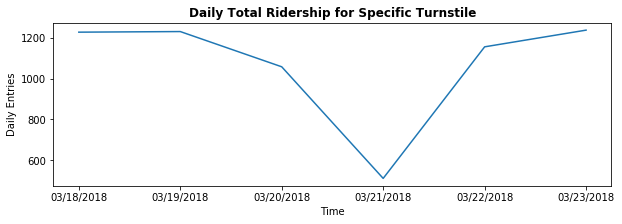

In [558]:
# Choosing random turnstile to plot
mtaTurnstilePlot = mtaTurnstileData_Daily[(mtaTurnstileData_Daily['BOOTH']=='TRAM2')&\
                        (mtaTurnstileData_Daily['UNIT']=='R469')&\
                        (mtaTurnstileData_Daily['SCP']=='00-03-01')]

dates = mtaTurnstilePlot['DATE']
counts = mtaTurnstilePlot['DAILYENTRIES']
plt.figure(figsize=(10,3))
plt.plot(dates,counts)
plt.xlabel('Time')
plt.ylabel('Daily Entries')
plt.title('Daily Total Ridership for Specific Turnstile',fontweight='bold')

#### Challenge 5

- So far we've been operating on a single turnstile level, let's
  combine turnstiles in the same ControlArea/Unit/Station combo. There
  are some ControlArea/Unit/Station groups that have a single
  turnstile, but most have multiple turnstilea-- same value for the
  C/A, UNIT and STATION columns, different values for the SCP column.

We want to combine the numbers together -- for each
ControlArea/UNIT/STATION combo, for each day, add the counts from each
turnstile belonging to that combo.

In [559]:
mtaTurnstileData_Daily.head()

,BOOTH,UNIT,SCP,STATION,DATE,ENTRIES,PREVDATE,PREVENTRIES,DAILYENTRIES
1,A002,R051,02-00-00,59 ST,03/18/2018,6552628,03/17/2018,6.553e+06,2.0
2,A002,R051,02-00-00,59 ST,03/19/2018,6553871,03/18/2018,6.553e+06,1243.0
3,A002,R051,02-00-00,59 ST,03/20/2018,6555252,03/19/2018,6.554e+06,1381.0
4,A002,R051,02-00-00,59 ST,03/21/2018,6556204,03/20/2018,6.555e+06,952.0
5,A002,R051,02-00-00,59 ST,03/22/2018,6557528,03/21/2018,6.556e+06,1324.0


In [560]:
mtaBoothData = mtaTurnstileData_Daily.groupby(["BOOTH", "UNIT", "STATION", "DATE"])[["DAILYENTRIES"]].sum()

In [561]:
mtaBoothData.head()

DAILYENTRIES
BOOTH UNIT STATION DATE                    
A002  R051 59 ST   03/18/2018         139.0
                   03/19/2018       11017.0
                   03/20/2018       12876.0
                   03/21/2018        9084.0
                   03/22/2018       11908.0

#### Challenge 6

Similarly, combine everything in each station, and come up with a time
series of `[(date1, count1),(date2,count2),...]` type of time series
for each STATION, by adding up all the turnstiles in a station.

In [562]:
mtaStationData = mtaTurnstileData_Daily.groupby(["STATION", "DATE"])[["DAILYENTRIES"]].sum()

In [563]:
mtaStationData = mtaBoothData.reset_index()
mtaStationData.head(15)

,BOOTH,UNIT,STATION,DATE,DAILYENTRIES
0,A002,R051,59 ST,03/18/2018,139.0
1,A002,R051,59 ST,03/19/2018,11017.0
2,A002,R051,59 ST,03/20/2018,12876.0
3,A002,R051,59 ST,03/21/2018,9084.0
4,A002,R051,59 ST,03/22/2018,11908.0
5,A002,R051,59 ST,03/23/2018,13400.0
6,A006,R079,5 AV/59 ST,03/18/2018,0.0
7,A006,R079,5 AV/59 ST,03/19/2018,10361.0
8,A006,R079,5 AV/59 ST,03/20/2018,11280.0
9,A006,R079,5 AV/59 ST,03/21/2018,7437.0


In [564]:
mtaStationData["SERIES"]=list(zip(mtaStationData["DATE"], mtaStationData["DAILYENTRIES"]))
mtaStationData.head()

,BOOTH,UNIT,STATION,DATE,DAILYENTRIES,SERIES
0,A002,R051,59 ST,03/18/2018,139.0,"(03/18/2018, 139.0)"
1,A002,R051,59 ST,03/19/2018,11017.0,"(03/19/2018, 11017.0)"
2,A002,R051,59 ST,03/20/2018,12876.0,"(03/20/2018, 12876.0)"
3,A002,R051,59 ST,03/21/2018,9084.0,"(03/21/2018, 9084.0)"
4,A002,R051,59 ST,03/22/2018,11908.0,"(03/22/2018, 11908.0)"


In [565]:
mtaStationData.drop(columns = ["DATE", "DAILYENTRIES"], axis = 1, inplace = True)
mtaStationData = mtaStationData.groupby(["STATION"])["SERIES"].apply(list)
mtaStationData.head()

STATION
1 AV             [(03/18/2018, 7756.0), (03/19/2018, 11622.0), ...
103 ST           [(03/18/2018, 1858.0), (03/19/2018, 4427.0), (...
103 ST-CORONA    [(03/18/2018, 10935.0), (03/19/2018, 19831.0),...
104 ST           [(03/18/2018, 503.0), (03/19/2018, 1441.0), (0...
110 ST           [(03/18/2018, 3604.0), (03/19/2018, 3961.0), (...
Name: SERIES, dtype: object

#### Challenge 7

Plot the time series for a station.

Text(0,0.5,'Total Entries')

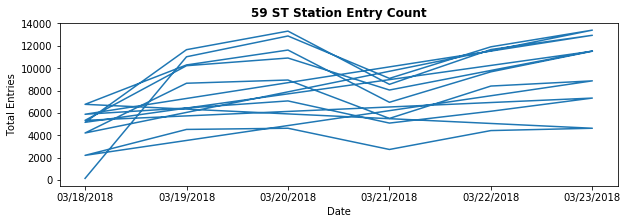

In [575]:
# zip(* unpacks arguments in the function
dates, counts = zip(*mtaStationData["59 ST"])

plt.figure(figsize=(10,3))
plt.plot(dates,counts);
plt.title("59 ST Station Entry Count", fontweight = "bold")
plt.xlabel("Date")
plt.ylabel("Total Entries")

#### Challenge 8

- Make one list of counts for **one** week for one station. Monday's
count, Tuesday's count, etc. so it's a list of 7 counts.
Make the same list for another week, and another week, and another
week.
`plt.plot(week_count_list)` for every `week_count_list` you created
this way. You should get a rainbow plot of weekly commute numbers on
top of each other.

In [572]:
station = mtaStationData["59 ST"]
date, counts = zip(*mtaStationData["59 ST"])

In [573]:
mtaStationData.head()

STATION
1 AV             [(03/18/2018, 7756.0), (03/19/2018, 11622.0), ...
103 ST           [(03/18/2018, 1858.0), (03/19/2018, 4427.0), (...
103 ST-CORONA    [(03/18/2018, 10935.0), (03/19/2018, 19831.0),...
104 ST           [(03/18/2018, 503.0), (03/19/2018, 1441.0), (0...
110 ST           [(03/18/2018, 3604.0), (03/19/2018, 3961.0), (...
Name: SERIES, dtype: object

In [577]:
# len(station) gives the number of tuples per station i.e. the number of days considered
# Dividing that value by 7 gives you the number of weeks of data for that specific station
weeks = int((len(station)/7))
print(weeks)

6


In [578]:
# Go through each week, and within that each day of the week
week_count_list = []
for entry in range(weeks):
    byweek_list = []
    for d in range(1,8):  
        byweek_list.append(counts[(entry*7)+(d-1)])
    week_count_list.append(byweek_list)

Text(0.5,1,'59 ST Entry Counts By Week')

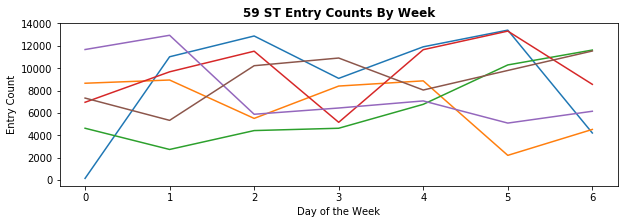

In [582]:
plt.figure(figsize=(10,3))
for week in week_count_list:
    plt.plot(week);
plt.xlabel("Day of the Week")
plt.ylabel("Entry Count")
plt.title("59 ST Entry Counts By Week", fontweight = "bold")

#### Challenge 9

- Over multiple weeks, sum total ridership for each station and sort
  them, so you can find out the stations with the highest traffic
  during the time you investigate

In [587]:
mtaTurnstileData_Daily.head()

,BOOTH,UNIT,SCP,STATION,DATE,ENTRIES,PREVDATE,PREVENTRIES,DAILYENTRIES
1,A002,R051,02-00-00,59 ST,03/18/2018,6552628,03/17/2018,6.553e+06,2.0
2,A002,R051,02-00-00,59 ST,03/19/2018,6553871,03/18/2018,6.553e+06,1243.0
3,A002,R051,02-00-00,59 ST,03/20/2018,6555252,03/19/2018,6.554e+06,1381.0
4,A002,R051,02-00-00,59 ST,03/21/2018,6556204,03/20/2018,6.555e+06,952.0
5,A002,R051,02-00-00,59 ST,03/22/2018,6557528,03/21/2018,6.556e+06,1324.0


In [592]:
totalRidershipByStation = mtaTurnstileData_Daily.groupby(["STATION"])["DAILYENTRIES"].sum().reset_index()
totalRidershipByStation.sort_values("DAILYENTRIES", ascending=False).head()

,STATION,DAILYENTRIES
117,AQUEDUCT N.COND,1.044e+06
309,PATH NEW WTC,9.074e+05
69,47-50 STS ROCK,8.934e+05
59,34 ST-PENN STA,8.243e+05
229,GRD CNTRL-42 ST,7.556e+05


#### Challenge 10

- Make a single list of these total ridership values and plot it with

    plt.hist(total_ridership_counts)

to get an idea about the distribution of total ridership among
different stations.

This should show you that most stations have a small traffic, and the
histogram bins for large traffic volumes have small bars.

*Additional Hint*:

If you want to see which stations take the meat of the traffic, you
can sort the total ridership counts and make a `plt.bar` graph. For
this, you want to have two lists: the indices of each bar, and the
values. The indices can just be `0,1,2,3,...`, so you can do

    indices = range(len(total_ridership_values))
    plt.bar(indices, total_ridership_values)

Text(0.5,1,'Distribution of Total Ridership Among Stations')

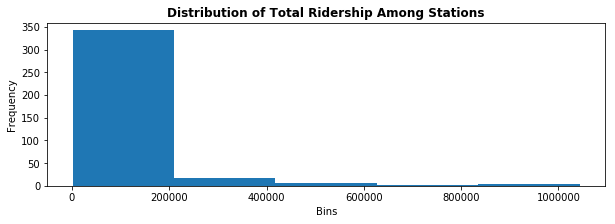

In [596]:
stations = list(totalRidershipByStation["STATION"])
total_ridership_counts = list(totalRidershipByStation["DAILYENTRIES"])

plt.figure(figsize=(10,3))
plt.hist(total_ridership_counts, bins=5);
plt.xlabel("Bins")
plt.ylabel("Frequency")
plt.title("Distribution of Total Ridership Among Stations", fontweight = "bold")

<BarContainer object of 372 artists>

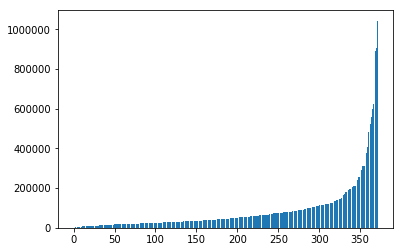

In [601]:
# If you want to see which stations take the meat of the traffic, you can sort the total ridership counts 
# and make a plt.bar graph. For this, you want to have two lists: the indices of each bar, and the values. 
# The indices can just be 0,1,2,3,..., so you can do

total_ridership_values = sorted(total_ridership_counts)
indices = range(len(total_ridership_counts))
plt.bar(indices, total_ridership_values)